Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Загрузка данных

In [2]:
data = pd.read_csv('C:/Users/Nastya/Desktop/data_analyse/DATA-ANALYSYS_2-master/Dataset/ORGANICS.csv', encoding="cp1251")

Обработка пропущенных значений - замена их на среднее

In [3]:
data = data.fillna(data.mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
ID                 22223 non-null int64
DemAffl            22223 non-null float64
DemAge             22223 non-null float64
DemCluster         22223 non-null float64
DemClusterGroup    21549 non-null object
DemGender          19711 non-null object
DemReg             21758 non-null object
DemTVReg           21758 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           22223 non-null float64
TargetBuy          22223 non-null int64
TargetAmt          22223 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB


Выбор колонок с числовым типом данных

In [4]:
x=data[['DemAffl',  'DemAge', 'DemCluster', 'PromSpend', 'PromTime']]
y=data.values[::,11].astype('float64')

Разделение на test и train

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

Создание массива количества деревьев

In [7]:
trees_grid = [i for i in range(1, 302, 10)]

Обучение леса на тренировочном датасете 

In [8]:
temp_test_acc = pd.DataFrame(columns=['ntree', 'score'])
for ntrees in trees_grid:
    rfc = BaggingClassifier(n_estimators=ntrees, n_jobs=-1, oob_score=True)
    rfc.fit(X_train, y_train)
    rfc.score(X_test, y_test)
    temp_test_acc = temp_test_acc.append({'ntree': ntrees, 'score': rfc.score(X_test, y_test)}, ignore_index=True)

In [9]:
temp_test_acc

,ntree,score
0,1.0,0.711864
1,11.0,0.773511
2,21.0,0.778461
3,31.0,0.782361
4,41.0,0.786711
5,51.0,0.785211
6,61.0,0.785361
7,71.0,0.784161
8,81.0,0.783561
9,91.0,0.783561


Построение графика

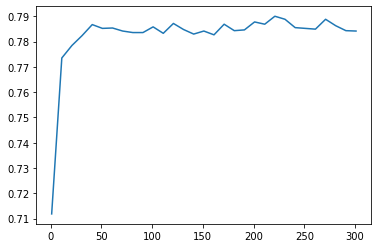

In [10]:
plt.plot(temp_test_acc['ntree'], temp_test_acc['score'])

Начиная с 41 дерева точность практически не меняется и придерживается уровня 0,785. При количестве 221 точность возрастает до 0,79, но минимально, так что можно сделать вывод, что оптимальное количество деревьев 41

График зависимости тестовой ошибки от параметра - max_samples

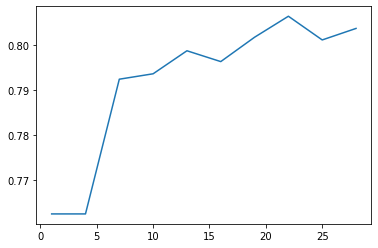

In [12]:
max_samples_grid = [i for i in range(1, 30, 3)]

temp_test_acc = pd.DataFrame(columns=['sample', 'score'])
for max_samples in max_samples_grid:
    rfc = BaggingClassifier(n_estimators=100, n_jobs=-1, oob_score=True, max_samples=max_samples)
    rfc.fit(X_train, y_train)
    rfc.score(X_test, y_test)
    temp_test_acc = temp_test_acc.append({'sample': max_samples, 'score': rfc.score(X_test, y_test)}, ignore_index=True)
    
plt.plot(temp_test_acc['sample'], temp_test_acc['score'])

In [13]:
temp_test_acc

,sample,score
0,1.0,0.762562
1,4.0,0.762562
2,7.0,0.792410
3,10.0,0.793610
4,13.0,0.798710
5,16.0,0.796310
6,19.0,0.801710
7,22.0,0.806360
8,25.0,0.801110
9,28.0,0.803660


При количестве выборок 23 наибольшая точность

График зависимости тестовой ошибки от параметра - max_features 

Применим полученные результаты 

In [15]:
rfc = BaggingClassifier(n_estimators=41, n_jobs=-1, oob_score=True, max_samples=23)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.7936103194840258